<a href="https://colab.research.google.com/github/ckiekim/Colab/blob/main/Keras_Sine_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GAN으로 Sine Wave 만들기

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator

In [3]:
# Generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n):
    z_input = np.random.randn(latent_dim * n)
    z_input = z_input.reshape(n, latent_dim)
    return z_input

In [4]:
# Define the standalone generator model
def define_generator(latent_dim, n_outputs=2):
    model = Sequential()
    model.add(Dense(15, input_dim=latent_dim, activation='relu'))
    model.add(Dense(n_outputs, activation='linear'))
    return model

In [5]:
# Define the standalone discriminator model
def define_discriminator(n_inputs=2):
    model = Sequential()
    model.add(Dense(25, input_dim=n_inputs, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [6]:
# Define the combined generator and discriminator model, for updating the generator
def define_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

In [7]:
# Generate n real samples with class labels
def generate_real_samples(n):
    p = (np.random.rand(n) - 0.5) * 2. * np.pi
    q = np.sin(p)
    p = p.reshape(n, 1)
    q = q.reshape(n, 1)
    x = np.hstack((p, q))
    y = np.ones((n, 1))
    return x, y

In [8]:
# Use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n):
    z_input = generate_latent_points(latent_dim, n)
    x = generator.predict(z_input)
    y = np.zeros((n, 1))
    return x, y

In [9]:
# Eevaluate the discriminator and plot real and fake points
def summarize_performance(epoch, generator, discriminator, latent_dim, n=100):
    x_real, y_real = generate_real_samples(n)
    _, acc_real = discriminator.evaluate(x_real, y_real, verbose=0)
    x_fake, y_fake = generate_fake_samples(generator, latent_dim, n)
    _, acc_fake = discriminator.evaluate(x_fake, y_fake, verbose=0)
    print(f'{epoch:06d}, {acc_real:.6f}, {acc_fake:.6f}')

    plt.figure(figsize=(6,4))
    ax = plt.axes()
    ax.set_xlabel(r'$alpha$', fontsize=20)
    ax.set_ylabel(r'$beta$',fontsize=20)
    majorLocator= MultipleLocator(1)
    minorLocator= AutoMinorLocator()
    majorFormatter= FormatStrFormatter('%d')
    minorFormatter= FormatStrFormatter('%d')
    ax.xaxis.set_major_locator(majorLocator)
    ax.xaxis.set_major_formatter(majorFormatter)
    ax.xaxis.set_minor_locator(minorLocator)
    majorLocator= MultipleLocator(1)
    minorLocator= AutoMinorLocator()
    majorFormatter= FormatStrFormatter('%d')
    minorFormatter= FormatStrFormatter('%d')
    ax.yaxis.set_major_locator(majorLocator)
    ax.yaxis.set_major_formatter(majorFormatter)
    ax.yaxis.set_minor_locator(minorLocator)
    ax.tick_params(which='major', length=2, color='black')
    ax.tick_params(which='minor', length=4, color='brown')
    ax.set_facecolor("beige")
    plt.grid(True)
    plt.scatter(x_real[:, 0], x_real[:, 1], color='red', s=5)
    plt.scatter(x_fake[:, 0], x_fake[:, 1], color='blue', s=5)
    plt.tight_layout()
    filename = f'sin{epoch:06d}.png'
    plt.savefig(filename, dpi=150)

In [10]:
# Train the generator and discriminator
def train(g_model, d_model, gan_model, latent_dim, n_epochs=100000, n_batch=128, n_eval=5000):
    half_batch = int(n_batch / 2)
    for i in range(1, n_epochs+1):
        x_real, y_real = generate_real_samples(half_batch)
        x_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
        d_model.train_on_batch(x_real, y_real)
        d_model.train_on_batch(x_fake, y_fake)

        x_gan = generate_latent_points(latent_dim, n_batch)
        y_gan = np.ones((n_batch, 1))
        gan_model.train_on_batch(x_gan, y_gan)

        if i == 10 or i == 1000 or i % n_eval == 0:
            summarize_performance(i, g_model, d_model, latent_dim)

000010, 0.510000, 0.590000
001000, 0.900000, 0.310000
005000, 0.510000, 0.710000
010000, 0.580000, 0.480000
015000, 0.430000, 0.710000
020000, 0.510000, 0.390000
025000, 0.600000, 0.430000
030000, 0.390000, 0.580000
035000, 0.600000, 0.410000
040000, 0.410000, 0.550000
045000, 0.660000, 0.320000
050000, 0.590000, 0.490000
055000, 0.660000, 0.300000
060000, 0.660000, 0.390000
065000, 0.440000, 0.620000
070000, 0.540000, 0.560000
075000, 0.450000, 0.640000
080000, 0.400000, 0.560000
085000, 0.560000, 0.510000
090000, 0.520000, 0.450000
095000, 0.570000, 0.380000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


100000, 0.340000, 0.800000
105000, 0.690000, 0.420000
110000, 0.660000, 0.350000
115000, 0.310000, 0.580000
120000, 0.390000, 0.820000


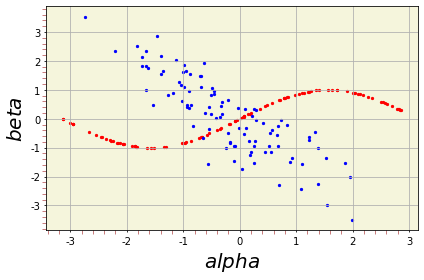

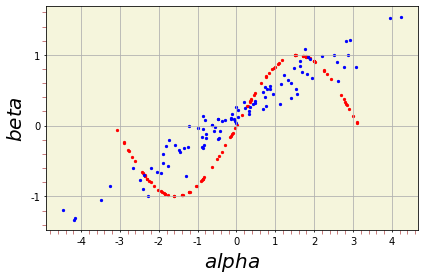

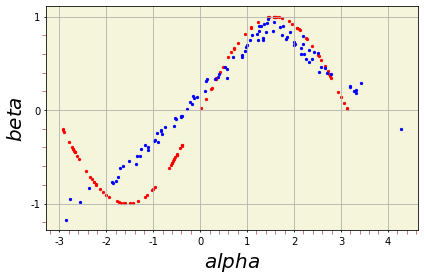

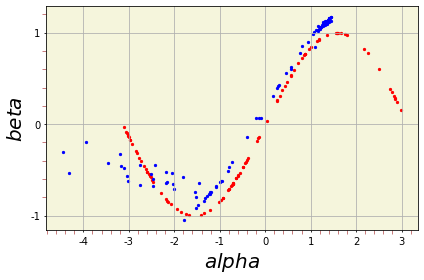

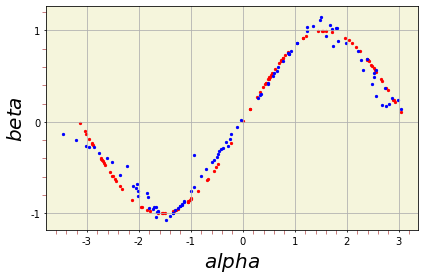

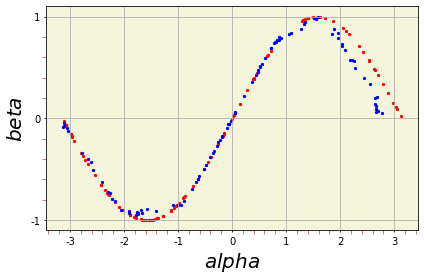

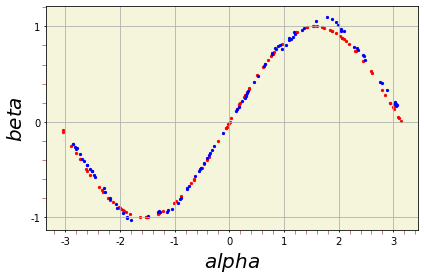

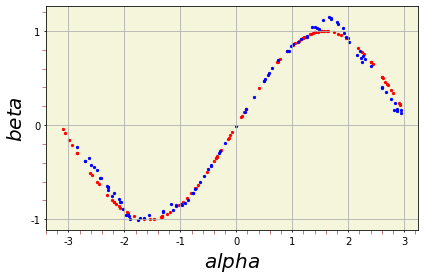

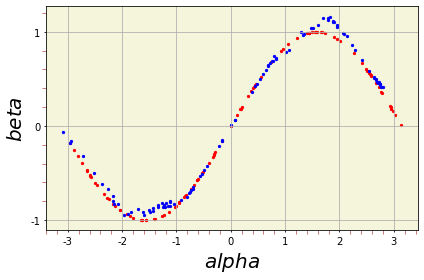

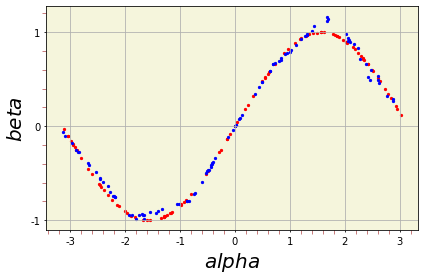

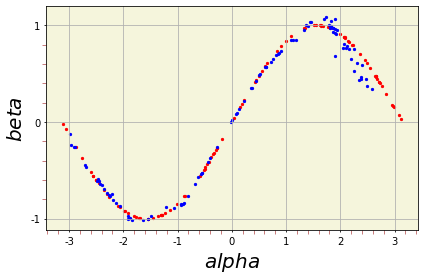

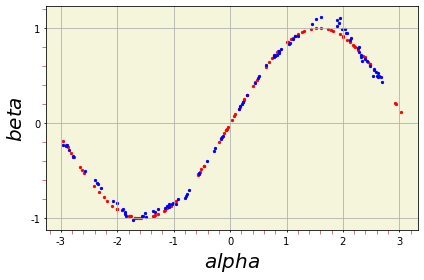

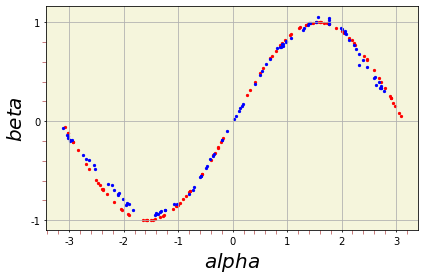

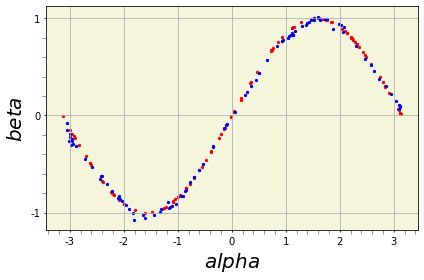

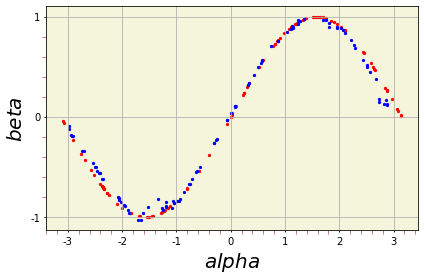

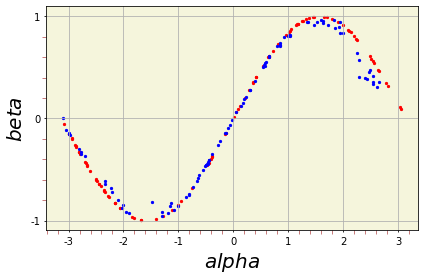

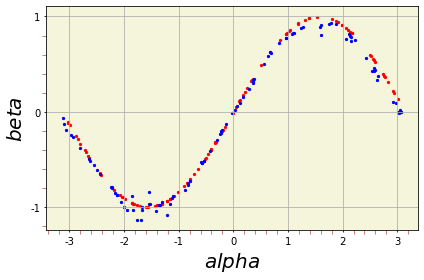

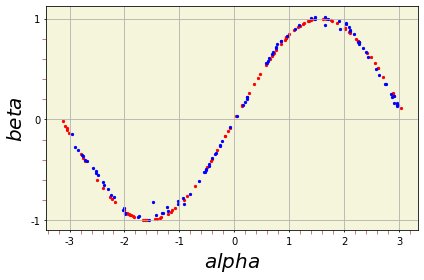

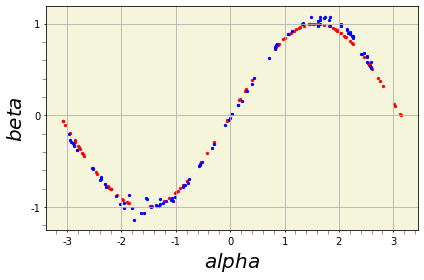

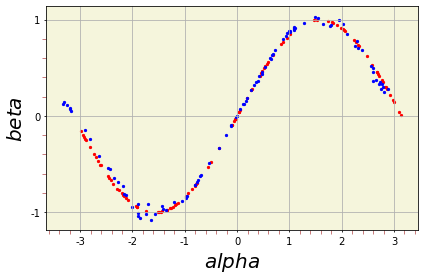

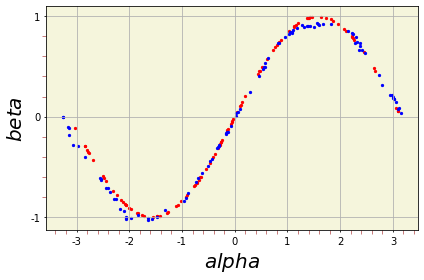

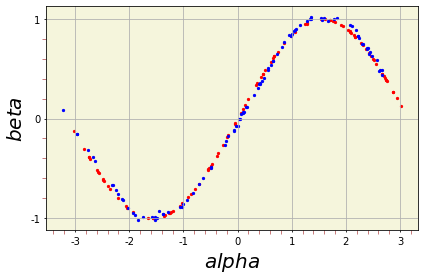

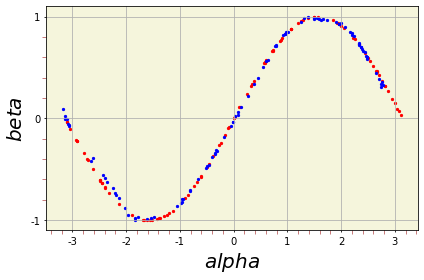

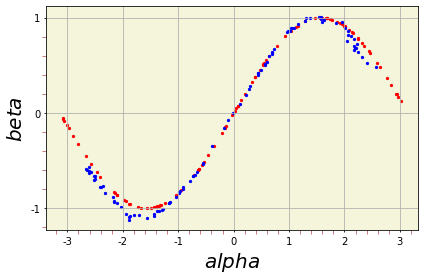

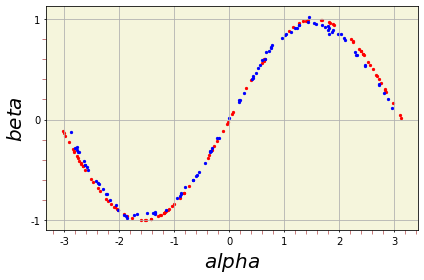

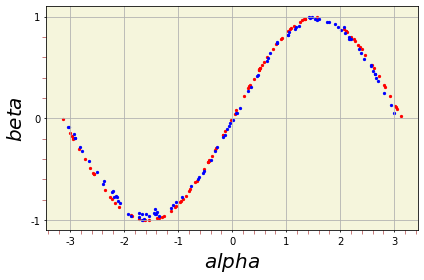

In [11]:
latent_dim = 10
discriminator = define_discriminator()
generator = define_generator(latent_dim)
gan_model = define_gan(generator, discriminator)

train(generator, discriminator, gan_model, latent_dim, n_epochs=120000)